<h1 align="center" style="color:#FF0800">
 Обробка та аналіз БМД.<br>
 Группа: БС-83<br>
 Мельничук Я.O.<br>
 Практикум Номер 4<br\></h1>

1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
data = pd.DataFrame({
    '1.normal': np.random.normal(loc=10, scale=5, size=20),
    '2.normal': np.random.normal(loc=5, scale=10, size=20),
    '3.normal':np.random.normal(loc=5, scale=10, size=20),
    '4.binom': np.random.binomial(n=50, p=0.9, size=20),
    '5.binom': np.random.binomial(n=50, p=0.9, size=20),
    '6.binom': np.random.binomial(n=50, p=0.9, size=20)
})

data

,1.normal,2.normal,3.normal,4.binom,5.binom,6.binom
0,11.537563,11.783549,0.959817,42,46,45
1,12.143650,-1.466430,-7.510948,46,47,46
2,9.485246,13.090261,4.343253,46,47,41
3,13.234637,12.127094,-16.798202,44,44,43
4,9.389628,16.259355,4.063224,48,44,45
5,10.854976,15.912234,-4.695688,44,43,44
6,8.680379,0.933828,19.624417,42,45,46
7,6.702896,9.085311,-3.366401,41,46,40
8,6.509462,18.519418,-11.157665,43,45,43
9,6.998807,8.477874,7.397076,46,46,44


2. Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних

In [3]:
data = pd.DataFrame({key: sorted(values) for key, values in data.transpose().iterrows()})

In [4]:
#1
def Value (array,n):
    x_sum =0
    for i in range(n):
        x_sum +=array[i]
    return x_sum/n
F_value_1 = {i: Value(data[i], 20) for i in data}

In [5]:
#2
def Squared(array, n, x):
    S2 = 0
    for i in range(n):
        S2 += ((array[i] - x)**2)
    return S2
S_s2 = {i: Squared(data[i], 20, F_value_1[i]) for i in data}

In [6]:
#3
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]
def w (array, n, S_s2):
    m = 0
    for i in range(n//2):
        m +=(a[i] * (array[(n-1)-i] - array[i]))
    return m**2 /S_s2

w_val = {i: w(data[i], 20, S_s2[i]) for i in data}
w_f = {i: sts.shapiro(data[i]) for i in data}

print("Практичне значення: w_val = ", w_val)
print(' ')
print("За вбудованою формулою: w_f = ", w_f)

Практичне значення: w_val =  {'1.normal': 0.9801856956441724, '2.normal': 0.9232371377505184, '3.normal': 0.9687561340814294, '4.binom': 0.9409157409351933, '5.binom': 0.9397087424083764, '6.binom': 0.9599081201450027}
 
За вбудованою формулою: w_f =  {'1.normal': (0.9803025126457214, 0.9379472732543945), '2.normal': (0.9232966303825378, 0.11468660831451416), '3.normal': (0.9689838886260986, 0.7332844734191895), '4.binom': (0.9408934712409973, 0.24927538633346558), '5.binom': (0.9397556185722351, 0.2372424304485321), '6.binom': (0.9600784778594971, 0.5454185605049133)}


3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. 
Кількість стовбчиків - 3. 
Назва стовпчиків - Variable, Statistics, Distribution.

In [7]:
headers = ['Variable', 'Statistics', 'Distribution']
new_table_data = pd.DataFrame(columns = headers)
new_table_data

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [8]:
new_table_data["Variable"] = data.keys()
new_table_data

,Variable,Statistics,Distribution
0,1.normal,NaN,NaN
1,2.normal,NaN,NaN
2,3.normal,NaN,NaN
3,4.binom,NaN,NaN
4,5.binom,NaN,NaN
5,6.binom,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [9]:
new_table_data["Distribution"] = [('normal ' if 'normal' in dist else 'non-normal ')
                          for dist in new_table_data["Variable"]]
new_table_data

,Variable,Statistics,Distribution
0,1.normal,NaN,normal
1,2.normal,NaN,normal
2,3.normal,NaN,normal
3,4.binom,NaN,non-normal
4,5.binom,NaN,non-normal
5,6.binom,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю.

In [10]:
for i in range (new_table_data.shape[0]):
    norm = new_table_data["Variable"][i]
    if 'normal' in norm:
        new_table_data["Statistics"][i] = f".{data[norm].mean()} [ {data[norm].std()} ]"
new_table_data

,Variable,Statistics,Distribution
0,1.normal,.9.753707745993 [ 4.6211265345602595 ],normal
1,2.normal,.6.84958156955444 [ 8.68359776098897 ],normal
2,3.normal,.1.5931019764029597 [ 8.610342848407917 ],normal
3,4.binom,NaN,non-normal
4,5.binom,NaN,non-normal
5,6.binom,NaN,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [11]:
for i in range (new_table_data.shape[0]):
    non_normal = new_table_data["Variable"][i]
    if 'normal'not in non_normal:
        new_table_data["Statistics"][i] = f".{data[non_normal].median()} \
        [{data[non_normal].quantile(0.25)}; {data[non_normal].quantile(0.75)}]"

new_table_data

,Variable,Statistics,Distribution
0,1.normal,.9.753707745993 [ 4.6211265345602595 ],normal
1,2.normal,.6.84958156955444 [ 8.68359776098897 ],normal
2,3.normal,.1.5931019764029597 [ 8.610342848407917 ],normal
3,4.binom,.45.0 [43.0; 46.0],non-normal
4,5.binom,.45.0 [43.75; 46.0],non-normal
5,6.binom,.44.5 [42.75; 46.0],non-normal


8. Зберегти таблицю в пдф форматі

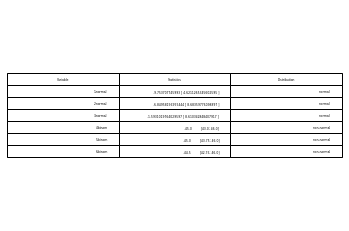

In [12]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_table_data)):
    cell_text.append(new_table_data.iloc[row])

ax.table(cellText=cell_text, colLabels=new_table_data.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()